# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

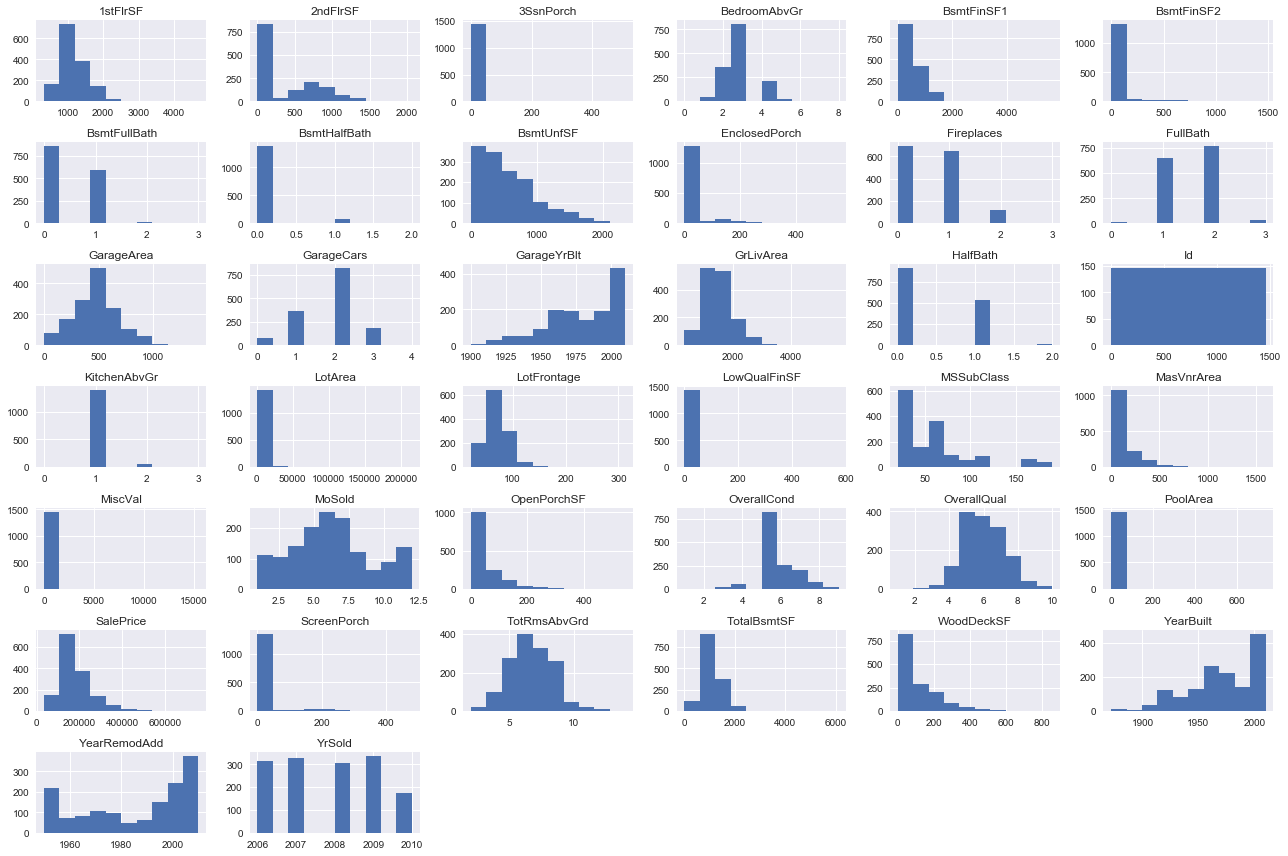

In [3]:
# Your code here
ames.hist(figsize=(18,12))
plt.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [7]:
# Select non zero-inflated continuous features as ames_cont
continuous = ['1stFlrSF', 'LotArea', 'GrLivArea', 'SalePrice']
ames_cont = ames[continuous]

## Perform log transformations for the variables where it makes sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff200daa048>,
      dtype=object)

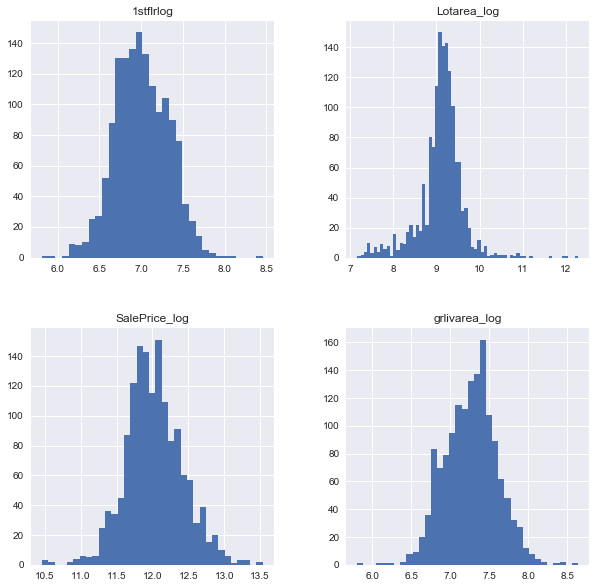

In [10]:
# Your code here
import numpy as np
ames_log = pd.DataFrame([])
ames_log['1stflrlog'] = np.log(ames_cont['1stFlrSF'])
ames_log['Lotarea_log'] = np.log(ames_cont['LotArea'])
ames_log['grlivarea_log'] = np.log(ames_cont['GrLivArea'])
ames_log['SalePrice_log'] = np.log(ames_cont['SalePrice'])

ames_log.hist(figsize=(10,10), bins='auto')

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [16]:
# Your code here
def normalize(x):
    xprime = (x - x.mean())/x.std()
    return xprime

features_final = pd.DataFrame([])
features_final = ames_log.apply(normalize)

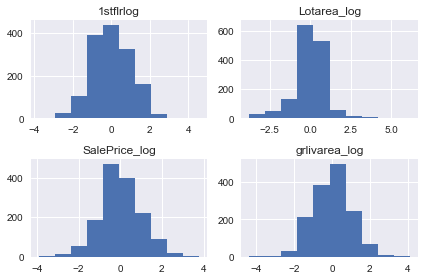

In [18]:
features_final.hist()
plt.tight_layout()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!